In [1]:
import os

In [2]:
import pandas as pd

In [5]:
data_dir = "Desktop/Datafiles"

In [7]:
data = []

for files in os.listdir(data_dir):
    if files.endswith(".txt"):
        fp = os.path.join(data_dir, files)
        df = pd.read_csv(fp, sep='\t')
        data.append(df)
        

data = pd.concat(data, ignore_index=True)

In [8]:
print(data)

        Gene                                  WildType.Sequence  \
0        Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
1     Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
2      Alli8  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...   
3    Anap7c1  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...   
4     App1l8  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...   
5       App8  CGGGAAGCTAACTTACTCATAAAGCCCGGTTCGAATAACATTTTGA...   
6    Avon1a5  ACTCCATGGCCATTTACCGGGGATTTCAACGCGATACTCCTTAGAT...   
7      Avon4  TGAATCTAAGATTAAGTGGATATCGCCTTGACTTCTTTATCCATCC...   
8     Ben3l6  CAACTTTAAGGAAGATGGTCGGTGCTTGATTCGTAAATCTGGTGTA...   
9       Bma9  CTACTTCCCCAAGCTCTTGAAATCTCGAAACATATTGTGCTGGTCC...   
10  Cairn1b8  ATCGCTAAGTGTATCCTGCACAGGTTAATAGAATGAGGATATTCGT...   
11  Cairn3a2  GCACTATGGAACAAATCTCCGTAGGATAGCCAGAGTAAATCGGCCT...   
12    Cairn6  GATTGCTAGTGGTAGTGGTGGCCCGGGTCGCCGTCCGCCACTCTTT...   
13    Clach6  AAATGACATCCTCCGGGGAACGATGCAGGCCCAGTAAGCCAATACT..

In [22]:
def mut(row):
    if row['WildType.Sequence'] == row['Mutant.Sequence']:
        return "no mutation"
    elif len(row['WildType.Sequence']) == len(row['Mutant.Sequence']):
        return "substitution mutation"
    elif len(row['WildType.Sequence']) > len(row['Mutant.Sequence']):
        return "deletion mutation"
    else:
        return "insertion mutation"
    

data['mt_type'] = df.apply(mut, axis=1)

In [23]:
data['mRNA.Expression.Mut.Rep_average'] = data[['mRNA.Expression.Mut.Rep1', 'mRNA.Expression.Mut.Rep2', 'mRNA.Expression.Mut.Rep3']].mean(axis=1)
data['mRNA.Expression.WT.Rep_average'] = data [['mRNA.Expression.WT.Rep1', 'mRNA.Expression.WT.Rep2', 'mRNA.Expression.WT.Rep3']].mean(axis=1)
data['mRNA.Expression.difference'] = data['mRNA.Expression.Mut.Rep_average'] - data['mRNA.Expression.WT.Rep_average']

In [24]:
data['Protein.Expression.Mut.Rep_average'] = data[['Protein.Expression.Mut.Rep1', 'Protein.Expression.Mut.Rep2', 'Protein.Expression.Mut.Rep3']].mean(axis=1)
data['Protein.Expression.WT.Rep_average'] = data[['Protein.Expression.WT.Rep1', 'Protein.Expression.WT.Rep2', 'Protein.Expression.WT.Rep3']].mean(axis=1)
data['Protein.Expression.difference'] = data['Protein.Expression.Mut.Rep_average'] - data['Protein.Expression.WT.Rep_average']

In [25]:
data['CellViability.Mut.Rep_average'] = data[['CellViability.Mut.Rep1', 'CellViability.Mut.Rep2', 'CellViability.Mut.Rep3']].mean(axis=1)
data['CellViability.WT.Rep_average'] = data[['CellViability.WT.Rep1', 'CellViability.WT.Rep2', 'CellViability.WT.Rep3']].mean(axis=1)
data['CellViability.difference'] = data['CellViability.Mut.Rep_average'] - data['CellViability.WT.Rep_average']

In [21]:
print(data)

        Gene                                  WildType.Sequence  \
0        Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
1     Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
2      Alli8  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...   
3    Anap7c1  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...   
4     App1l8  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...   
5       App8  CGGGAAGCTAACTTACTCATAAAGCCCGGTTCGAATAACATTTTGA...   
6    Avon1a5  ACTCCATGGCCATTTACCGGGGATTTCAACGCGATACTCCTTAGAT...   
7      Avon4  TGAATCTAAGATTAAGTGGATATCGCCTTGACTTCTTTATCCATCC...   
8     Ben3l6  CAACTTTAAGGAAGATGGTCGGTGCTTGATTCGTAAATCTGGTGTA...   
9       Bma9  CTACTTCCCCAAGCTCTTGAAATCTCGAAACATATTGTGCTGGTCC...   
10  Cairn1b8  ATCGCTAAGTGTATCCTGCACAGGTTAATAGAATGAGGATATTCGT...   
11  Cairn3a2  GCACTATGGAACAAATCTCCGTAGGATAGCCAGAGTAAATCGGCCT...   
12    Cairn6  GATTGCTAGTGGTAGTGGTGGCCCGGGTCGCCGTCCGCCACTCTTT...   
13    Clach6  AAATGACATCCTCCGGGGAACGATGCAGGCCCAGTAAGCCAATACT..

In [26]:
def loc(row):
    WT_seq = row["WildType.Sequence"]
    mut_seq = row["Mutant.Sequence"]
    
    mut_loc = [i for i in range(min(len(WT_seq), len(mut_seq))) if WT_seq[i] != mut_seq[i]]
    
    if any(position < 1000 for position in mut_loc):
        return "promoter"
    elif any(position > 1000 for position in mut_loc):
        return "CDS"
    else:
        return "no mutation"
    
data["mut_pos"] = data.apply(loc,axis=1)

print (data)

        Gene                                  WildType.Sequence  \
0        Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
1     Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
2      Alli8  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...   
3    Anap7c1  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...   
4     App1l8  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...   
5       App8  CGGGAAGCTAACTTACTCATAAAGCCCGGTTCGAATAACATTTTGA...   
6    Avon1a5  ACTCCATGGCCATTTACCGGGGATTTCAACGCGATACTCCTTAGAT...   
7      Avon4  TGAATCTAAGATTAAGTGGATATCGCCTTGACTTCTTTATCCATCC...   
8     Ben3l6  CAACTTTAAGGAAGATGGTCGGTGCTTGATTCGTAAATCTGGTGTA...   
9       Bma9  CTACTTCCCCAAGCTCTTGAAATCTCGAAACATATTGTGCTGGTCC...   
10  Cairn1b8  ATCGCTAAGTGTATCCTGCACAGGTTAATAGAATGAGGATATTCGT...   
11  Cairn3a2  GCACTATGGAACAAATCTCCGTAGGATAGCCAGAGTAAATCGGCCT...   
12    Cairn6  GATTGCTAGTGGTAGTGGTGGCCCGGGTCGCCGTCCGCCACTCTTT...   
13    Clach6  AAATGACATCCTCCGGGGAACGATGCAGGCCCAGTAAGCCAATACT..

In [30]:
def analyze_CellViability(row):
    if row['CellViability.Mut.Rep_average'] > 0:
        return 'Increase'
    elif row['CellViability.Mut.Rep_average'] < 0:
        return 'Decrease'
    else:
        return 'None'
    
data['analyze_CellViability'] = data.apply(analyze_CellViability, axis=1)
sort_genes = data.sort_values(by='analyze_CellViability', ascending=False)
top5_genes = sort_genes.head(5)

print(top5_genes[['Gene', 'mt_type', 'analyze_CellViability', 'mut_pos', 'CellViability.Mut.Rep_average']])
                                          

       Gene            mt_type analyze_CellViability   mut_pos  \
3   Anap7c1                NaN                  None  promoter   
39   Oyu3a9                NaN                  None  promoter   
15  Dsgt9a1                NaN                  None       CDS   
0       Ah3  deletion mutation              Increase  promoter   
36    Mdor8                NaN              Increase  promoter   

    CellViability.Mut.Rep_average  
3                        0.000000  
39                       0.000000  
15                       0.000000  
0                        0.599650  
36                       0.302088  


In [28]:
import matplotlib.pyplot as plt

In [29]:
import seaborn as sbn

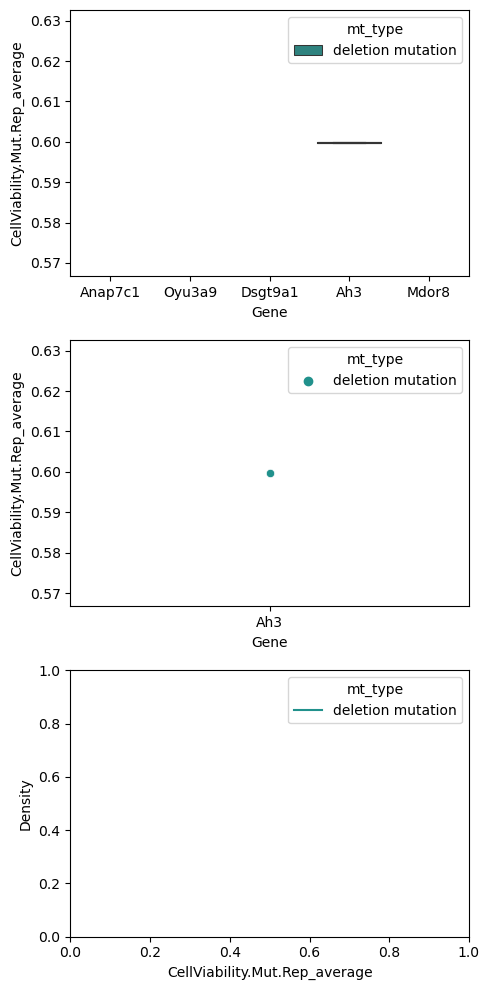

In [32]:
fig, axes = plt.subplots(3, 1, figsize=(5,10))

sbn.boxplot(x='Gene',
            y='CellViability.Mut.Rep_average',
            hue='mt_type',
            data=top5_genes,
            palette='viridis',
            ax=axes[0])
axes[0].set_ylabel('CellViability.Mut.Rep_average')

sbn.scatterplot(x='Gene',
                y='CellViability.Mut.Rep_average',
                hue='mt_type',
                data=top5_genes,
                palette='viridis',
                ax=axes[1])
axes[1].set_xlabel('Gene')
axes[1].set_ylabel('CellViability.Mut.Rep_average')

sbn.kdeplot(x='CellViability.Mut.Rep_average',
            hue='mt_type',
            data=top5_genes,
            palette='viridis',
            ax=axes[2], warn_singular=False)
axes[2].set_xlabel('CellViability.Mut.Rep_average')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()